# Task: To predict hotel cancellations using a Keras-based neural network.

## Original hotel booking demand datasets by authors Nuno Antonio, Ana de Almeida, and Luis Nunes available at:

### https://www.sciencedirect.com/science/article/pii/S2352340918315191

## The same neural network is run, but this time using TF 2.0 standards.

In [1]:
import tensorflow as tf
print(tf.__version__)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/

2.0.0-beta1


/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site

## Import libraries

In [2]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

## Import training dataset H1 and sort by year and week number.

In [3]:
train_df = pd.read_csv('H1.csv')
a=train_df.head()
b=train_df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
73,1,152,2015,July,27,2,4,10,2,0,...,No Deposit,243,NULL,0,Contract,67.58,0,0,Canceled,2015-04-03
272,0,45,2015,July,27,2,2,3,2,0,...,No Deposit,8,NULL,0,Contract,79.50,0,0,Check-Out,2015-07-07
303,0,1,2015,July,27,2,0,1,2,0,...,No Deposit,240,NULL,0,Transient,147.00,1,0,Check-Out,2015-07-03
339,0,130,2015,July,27,4,2,6,2,0,...,No Deposit,196,NULL,0,Transient,96.95,1,1,Check-Out,2015-07-12
430,0,37,2015,July,27,1,1,4,1,0,...,No Deposit,241,NULL,0,Transient,97.29,0,1,Check-Out,2015-07-06
529,0,98,2015,July,27,4,2,1,2,0,...,No Deposit,8,NULL,0,Transient,71.55,1,0,Check-Out,2015-07-07
756,0,150,2015,July,27,2,2,4,2,0,...,No Deposit,156,NULL,0,Contract,55.68,0,0,Check-Out,2015-07-08
874,0,157,2015,July,27,4,4,6,2,0,...,No Deposit,156,NULL,0,Contract,55.68,0,0,Check-Out,2015-07-14
1182,0,1,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,270,0,Transient,134.00,0,0,Check-Out,2015-07-02
1279,1,26,2015,July,27,4,2,5,2,2,...,No Deposit,240,NULL,0,Transient,163.00,0,0,Canceled,2015-06-09


## Dependent variable (y). Cancellation by customer = 1, no cancellation by customer = 0.

In [4]:
IsCanceled = train_df['IsCanceled']
y = IsCanceled

## Features (or independent variables) hypothesised to influence hotel cancellations.

In [5]:
leadtime = train_df['LeadTime'] #1
staysweekendnights = train_df['StaysInWeekendNights'] #2
staysweeknights = train_df['StaysInWeekNights'] #3
adults = train_df['Adults'] #4
children = train_df['Children'] #5
babies = train_df['Babies'] #6
isrepeatedguest = train_df['IsRepeatedGuest'] #11
previouscancellations = train_df['PreviousCancellations'] #12
previousbookingsnotcanceled = train_df['PreviousBookingsNotCanceled'] #13
bookingchanges = train_df['BookingChanges'] #16
agent = train_df['Agent'] #18
company = train_df['Company'] #19
dayswaitinglist = train_df['DaysInWaitingList'] #20
adr = train_df['ADR'] #22
rcps = train_df['RequiredCarParkingSpaces'] #23
totalsqr = train_df['TotalOfSpecialRequests'] #24

## Categorical variables - variables that do not have an interval scale, e.g. 1-100.

### cat.codes is being used to define these categorical variables, as assigning a number to each variable without specifying that variable as a category will lead to Python treating each variable as interval.

In [6]:
mealcat=train_df.Meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=train_df.Country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.MarketSegment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=train_df.DistributionChannel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=train_df.ReservedRoomType.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=train_df.AssignedRoomType.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=train_df.DepositType.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.CustomerType.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=train_df.ReservationStatus.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)

## minmax_scale is used to scale the relevant independent variable (in this case, lead time) to a value between 0 and 1.

### If the variables in the neural network do not have a common scale, then it will increase the likelihood of incorrect interpretations by the neural network.

In [7]:
from sklearn.preprocessing import minmax_scale
leadtime = minmax_scale(leadtime)
leadtime

array([0.11283498, 0.10719323, 0.11424542, ..., 0.13822285, 0.19605078,
       0.06488011])

## All independent variables are stacked together using numpy.

In [8]:
x1 = np.column_stack((leadtime,deposittypecat,countrycat))
x1 = sm.add_constant(x1, prepend=True)

## A train-test split is used to partition the data into training (used to train the model), and validation (check predictions) against the actual cancellation incidences and update the model accordingly.

### The actual test data (or unseen data) is the H2 dataset - you will use this soon to test the model predictions against the actual cancellations for H2.

In [9]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, random_state=0)

## In TF v1.0, Sequential, Dense, and KerasRegressor were being imported separately. In TF 2.0, models and layers are being imported from keras, and the above no longer need to be manually imported.

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

### 'sigmoid' is used as the activation function for the output node given that this is a classification problem.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4,)))
model.add(layers.Dense(1, activation='sigmoid'))

## The adam optimizer is used to train the model, and the binary_crossentropy is used as the loss function.

### Loss = degree of error between the predicted and actual values.

### 500 epochs (or forward and backward passes) are used to train the model.

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x1_train,
                  y1_train,
                  epochs=500,
                  batch_size=512,
                  validation_data=(x1_test, y1_test))

W0923 13:04:04.155865 140374053594944 deprecation.py:323] From /home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 5000 samples
Epoch 1/500
15000/15000 [==============================] - 1s 53us/sample - loss: 6.8049 - acc: 0.4931 - val_loss: 6.3876 - val_acc: 0.5010
Epoch 2/500
15000/15000 [==============================] - 0s 11us/sample - loss: 4.5825 - acc: 0.4930 - val_loss: 1.9779 - val_acc: 0.5006
Epoch 3/500
15000/15000 [==============================] - 0s 14us/sample - loss: 0.9839 - acc: 0.4891 - val_loss: 0.7622 - val_acc: 0.4938
Epoch 4/500
15000/15000 [==============================] - 0s 12us/sample - loss: 0.7013 - acc: 0.5153 - val_loss: 0.6885 - val_acc: 0.5588
Epoch 5/500
15000/15000 [==============================] - 0s 11us/sample - loss: 0.6860 - acc: 0.5114 - val_loss: 0.6849 - val_acc: 0.4982
Epoch 6/500
15000/15000 [==============================] - 0s 11us/sample - loss: 0.6826 - acc: 0.5384 - val_loss: 0.6826 - val_acc: 0.4998
Epoch 7/500
15000/15000 [==============================] - 0s 13us/sample - loss: 0.6796 - acc: 0.5075 - val_lo

## Here is a plot of the train and validation loss.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


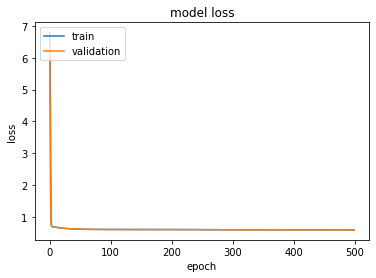

In [12]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## This is a plot of the train vs. validation accuracy.

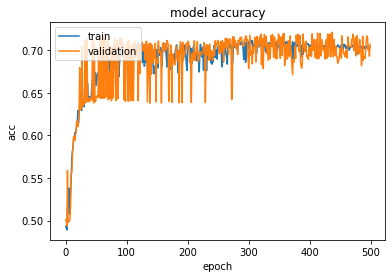

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Here are the predictions from the model.

In [14]:
pred=model.predict(x1_test)

## AUC (or area under the curve) is used to assess the classifier accuracy.

### An AUC of 0.5 means that the model performs no better than random guessing. A value above 0.5 means that the model has predictive power.

AUC: 0.756


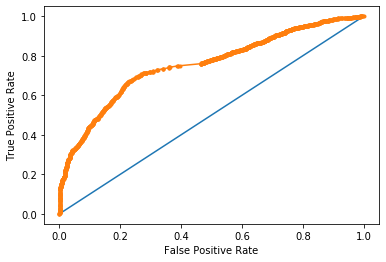

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

falsepos, truepos, thresholds = roc_curve(y1_test, pred)

auc = roc_auc_score(y1_test, pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y1_test, pred)
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(falsepos, truepos, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## H2 - TEST SET WITH UNSEEN DATA

### Now, data from H2.csv (or the second hotel in the study) is being imported and processed. As you will see in the exercise below, your task is now to train the built model on the new data, generate new classifications and compare these to the existing records in H2.

In [16]:
h2data = pd.read_csv('H2.csv')
a=h2data.head()
a

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,1,73,2017,April,14,3,1,1,2,0.0,...,No Deposit,9,NULL,0,Transient,99.00,0,0,Canceled,2017-02-23
1,0,9,2017,March,12,23,1,3,2,0.0,...,No Deposit,7,NULL,0,Transient,190.40,0,1,Check-Out,2017-03-27
2,0,39,2015,August,33,10,1,1,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,62.00,0,0,Check-Out,2015-08-12
3,0,4,2017,February,7,17,1,2,2,0.0,...,No Deposit,28,NULL,0,Contract,68.00,0,0,Check-Out,2017-02-20
4,1,222,2016,July,28,6,1,4,2,0.0,...,No Deposit,9,NULL,0,Contract,90.95,0,1,Canceled,2015-12-14


In [17]:
t_leadtime = h2data['LeadTime'] #1
t_staysweekendnights = h2data['StaysInWeekendNights'] #2
t_staysweeknights = h2data['StaysInWeekNights'] #3
t_adults = h2data['Adults'] #4
t_children = h2data['Children'] #5
t_babies = h2data['Babies'] #6
t_isrepeatedguest = h2data['IsRepeatedGuest'] #11
t_previouscancellations = h2data['PreviousCancellations'] #12
t_previousbookingsnotcanceled = h2data['PreviousBookingsNotCanceled'] #13
t_bookingchanges = h2data['BookingChanges'] #16
t_agent = h2data['Agent'] #18
t_company = h2data['Company'] #19
t_dayswaitinglist = h2data['DaysInWaitingList'] #20
t_adr = h2data['ADR'] #22
t_rcps = h2data['RequiredCarParkingSpaces'] #23
t_totalsqr = h2data['TotalOfSpecialRequests'] #24

In [18]:
t_mealcat=h2data.Meal.astype("category").cat.codes
t_mealcat=pd.Series(t_mealcat)
t_countrycat=h2data.Country.astype("category").cat.codes
t_countrycat=pd.Series(t_countrycat)
t_marketsegmentcat=h2data.MarketSegment.astype("category").cat.codes
t_marketsegmentcat=pd.Series(t_marketsegmentcat)
t_distributionchannelcat=h2data.DistributionChannel.astype("category").cat.codes
t_distributionchannelcat=pd.Series(t_distributionchannelcat)
t_reservedroomtypecat=h2data.ReservedRoomType.astype("category").cat.codes
t_reservedroomtypecat=pd.Series(t_reservedroomtypecat)
t_assignedroomtypecat=h2data.AssignedRoomType.astype("category").cat.codes
t_assignedroomtypecat=pd.Series(t_assignedroomtypecat)
t_deposittypecat=h2data.DepositType.astype("category").cat.codes
t_deposittypecat=pd.Series(t_deposittypecat)
t_customertypecat=h2data.CustomerType.astype("category").cat.codes
t_customertypecat=pd.Series(t_customertypecat)
t_reservationstatuscat=h2data.ReservationStatus.astype("category").cat.codes
t_reservationstatuscat=pd.Series(t_reservationstatuscat)

In [19]:
t_leadtime=np.array(t_leadtime)

In [20]:
lttest = minmax_scale(t_leadtime)
lttest

array([0.11661342, 0.014377  , 0.06230032, ..., 0.4313099 , 0.1884984 ,
       0.02555911])

In [21]:
t1 = np.column_stack((lttest,t_deposittypecat,t_countrycat))
t1 = sm.add_constant(t1, prepend=True)

In [22]:
IsCanceled = h2data['IsCanceled']
b = IsCanceled
b=b.values

# EXERCISE

## Using the model that has been built, generate new predictions for H2 and generate an AUC curve plotting the true vs. false positive rate.

### Hint: You must use the model.predict command on the new data you are trying to predict, and then generate the AUC curve in the same manner as before by comparing the predictions to the actual data.